# Homework Assignment: Understanding Binary Cross-Entropy in the Forward Stagewise Procedure
-----------------------------

Homework7: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Kos261/ML25/blob/main/Lab7/HW7.ipynb)

## The Problem

In this assignment, you will demonstrate that adding a new constant predictor in the forward stagewise procedure to an already existing predictor from a previous stage, $f_{m-1}(x_i)$ (which we will denote as $f_i$ for ease of notation), may be for certain loss functions fundamentally more challenging than building a constant predictor from scratch. You will work with the binary cross-entropy loss defined as

$$
L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z)),
$$

where

- $y_i \in \{0,1\}$ are the binary labels,
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

For the purposes of this assignment, assume that you are given:

- A dataset of binary labels $y_i$.
- **Two constants: $m$ (the number of ones) and $k$ (the number of zeros)** in the labels in the dataset.
- A set of predictions $f_i = f_{m-1}(x_i)$ obtained from a previous stage, where the $f_i$ values are generated randomly from a normal distribution.

### The assignment will explore two scenarios:

### Scenario A: Fitting a Constant Predictor from Scratch

In this scenario, you are building a predictor from scratch. The task is to find the optimal constant value $\lambda$ that minimizes the binary cross-entropy loss over the dataset. Formulate the optimization problem as:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$



### Scenario B: Fitting the m-th Predictor in the Forward Stagewise Procedure

Now assume you already have an existing predictor $f_i = f_{m-1}(x_i)$. Rather than predicting from scratch, you wish to find an optimal additive correction $\lambda$ such that the updated prediction for each data point becomes

$$
 f_i + \lambda,
$$

and the corresponding binary cross-entropy loss is given by

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$


## Research Questions

In this assignment you will answer the following questions:

- Why is finding an optimal additive shift $\lambda$ in the forward stagewise procedure fundamentally harder than directly fitting a single-parameter predictor from scratch?
- How does the complexity of the loss landscape differ between these two scenarios? Discuss the differences in the shape and smoothness of the loss function in both cases.

## Tasks & Deliverables

1. **Derivation and Analysis**

  **Scenario A:**
  - Derive explicitly the optimal $\lambda$ for fitting from scratch, i.e., solve
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)
    $$
    
    and express the answer in terms of $m$ and $k$.
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Interpretation:**
  Provide a clear interpretation of your derived optimal $\lambda$. What does this constant represent in terms of the dataset's label distribution?

  **Scenario B:**
  - Derive the implicit equation that $\lambda$ must satisfy in the additive shift scenario:
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
    $$
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Discussion:**
    Explain clearly why this implicit equation has no simple closed-form solution, unlike the previous case. What role does the non-linearity of the sigmoid function (in the binary cross-entropy loss) play in this difficulty?

2. **Loss Landscape Exploration (Python)**

  Write a Python code that:

  - Uses provided values for $n$, and for $k$ and $m$ (the number of zeros and ones in the labels, respectively), $k+m=n$.
  - Generates a set of predictions $f_i$ by sampling from a normal distribution.
  - Plots the binary cross-entropy loss as a function of $\lambda$ for:
    - Scenario A:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, \lambda) \text{ as a function of }\lambda
      $$
    - Scenario B:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, f_i + \lambda) \text{ as a function of }\lambda
      $$
  - **Discussion:**
  Is the loss landscape in Scenario A simpler or more complex than in Scenario B? Is it multimodal or unimodal? If so, is it thinkable the lambda minimizer in Scenario B can be found numerically? Where does the difficulty in Scenario B come from: the non-linearity of the problem or a complex loss landscape?

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.

# CALCULATIONS

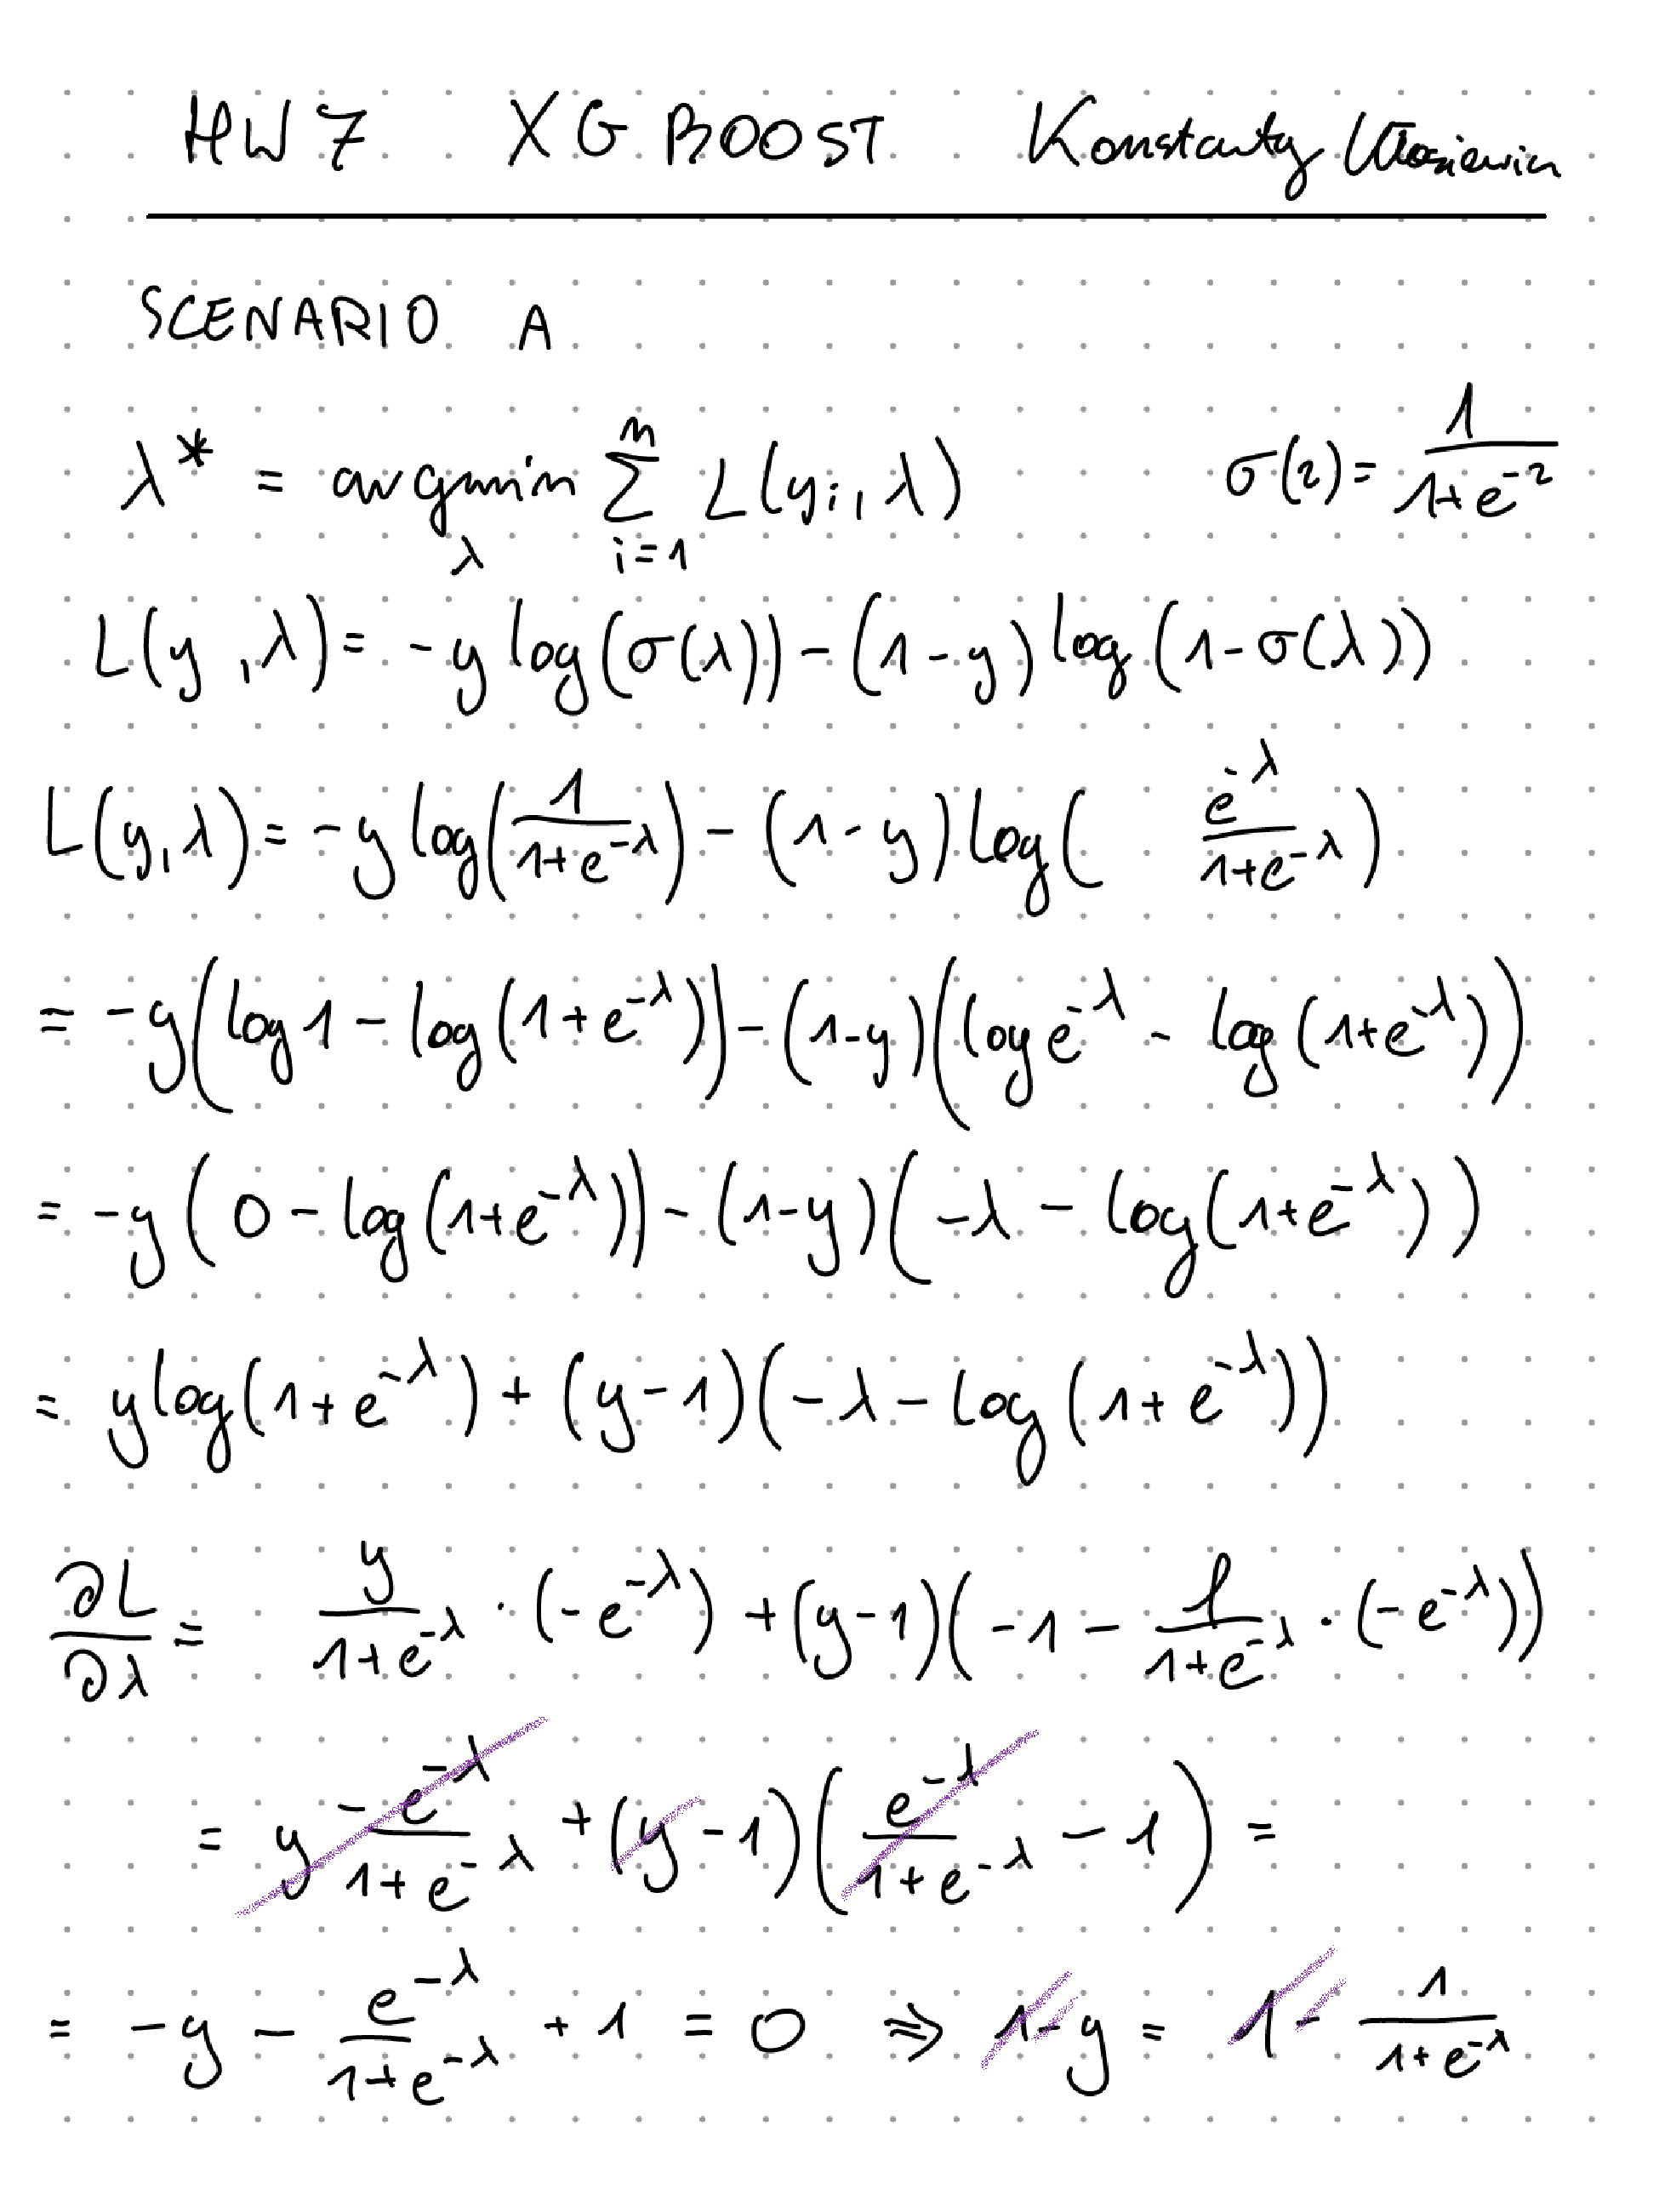

In [ ]:
from wand.image import Image as WImage
file = '/home/konstanty/Projects/UW/ML25/Lab7/samples/ml1_note.pdf[0]'
img = WImage(filename=file, resolution=100) # bigger
img

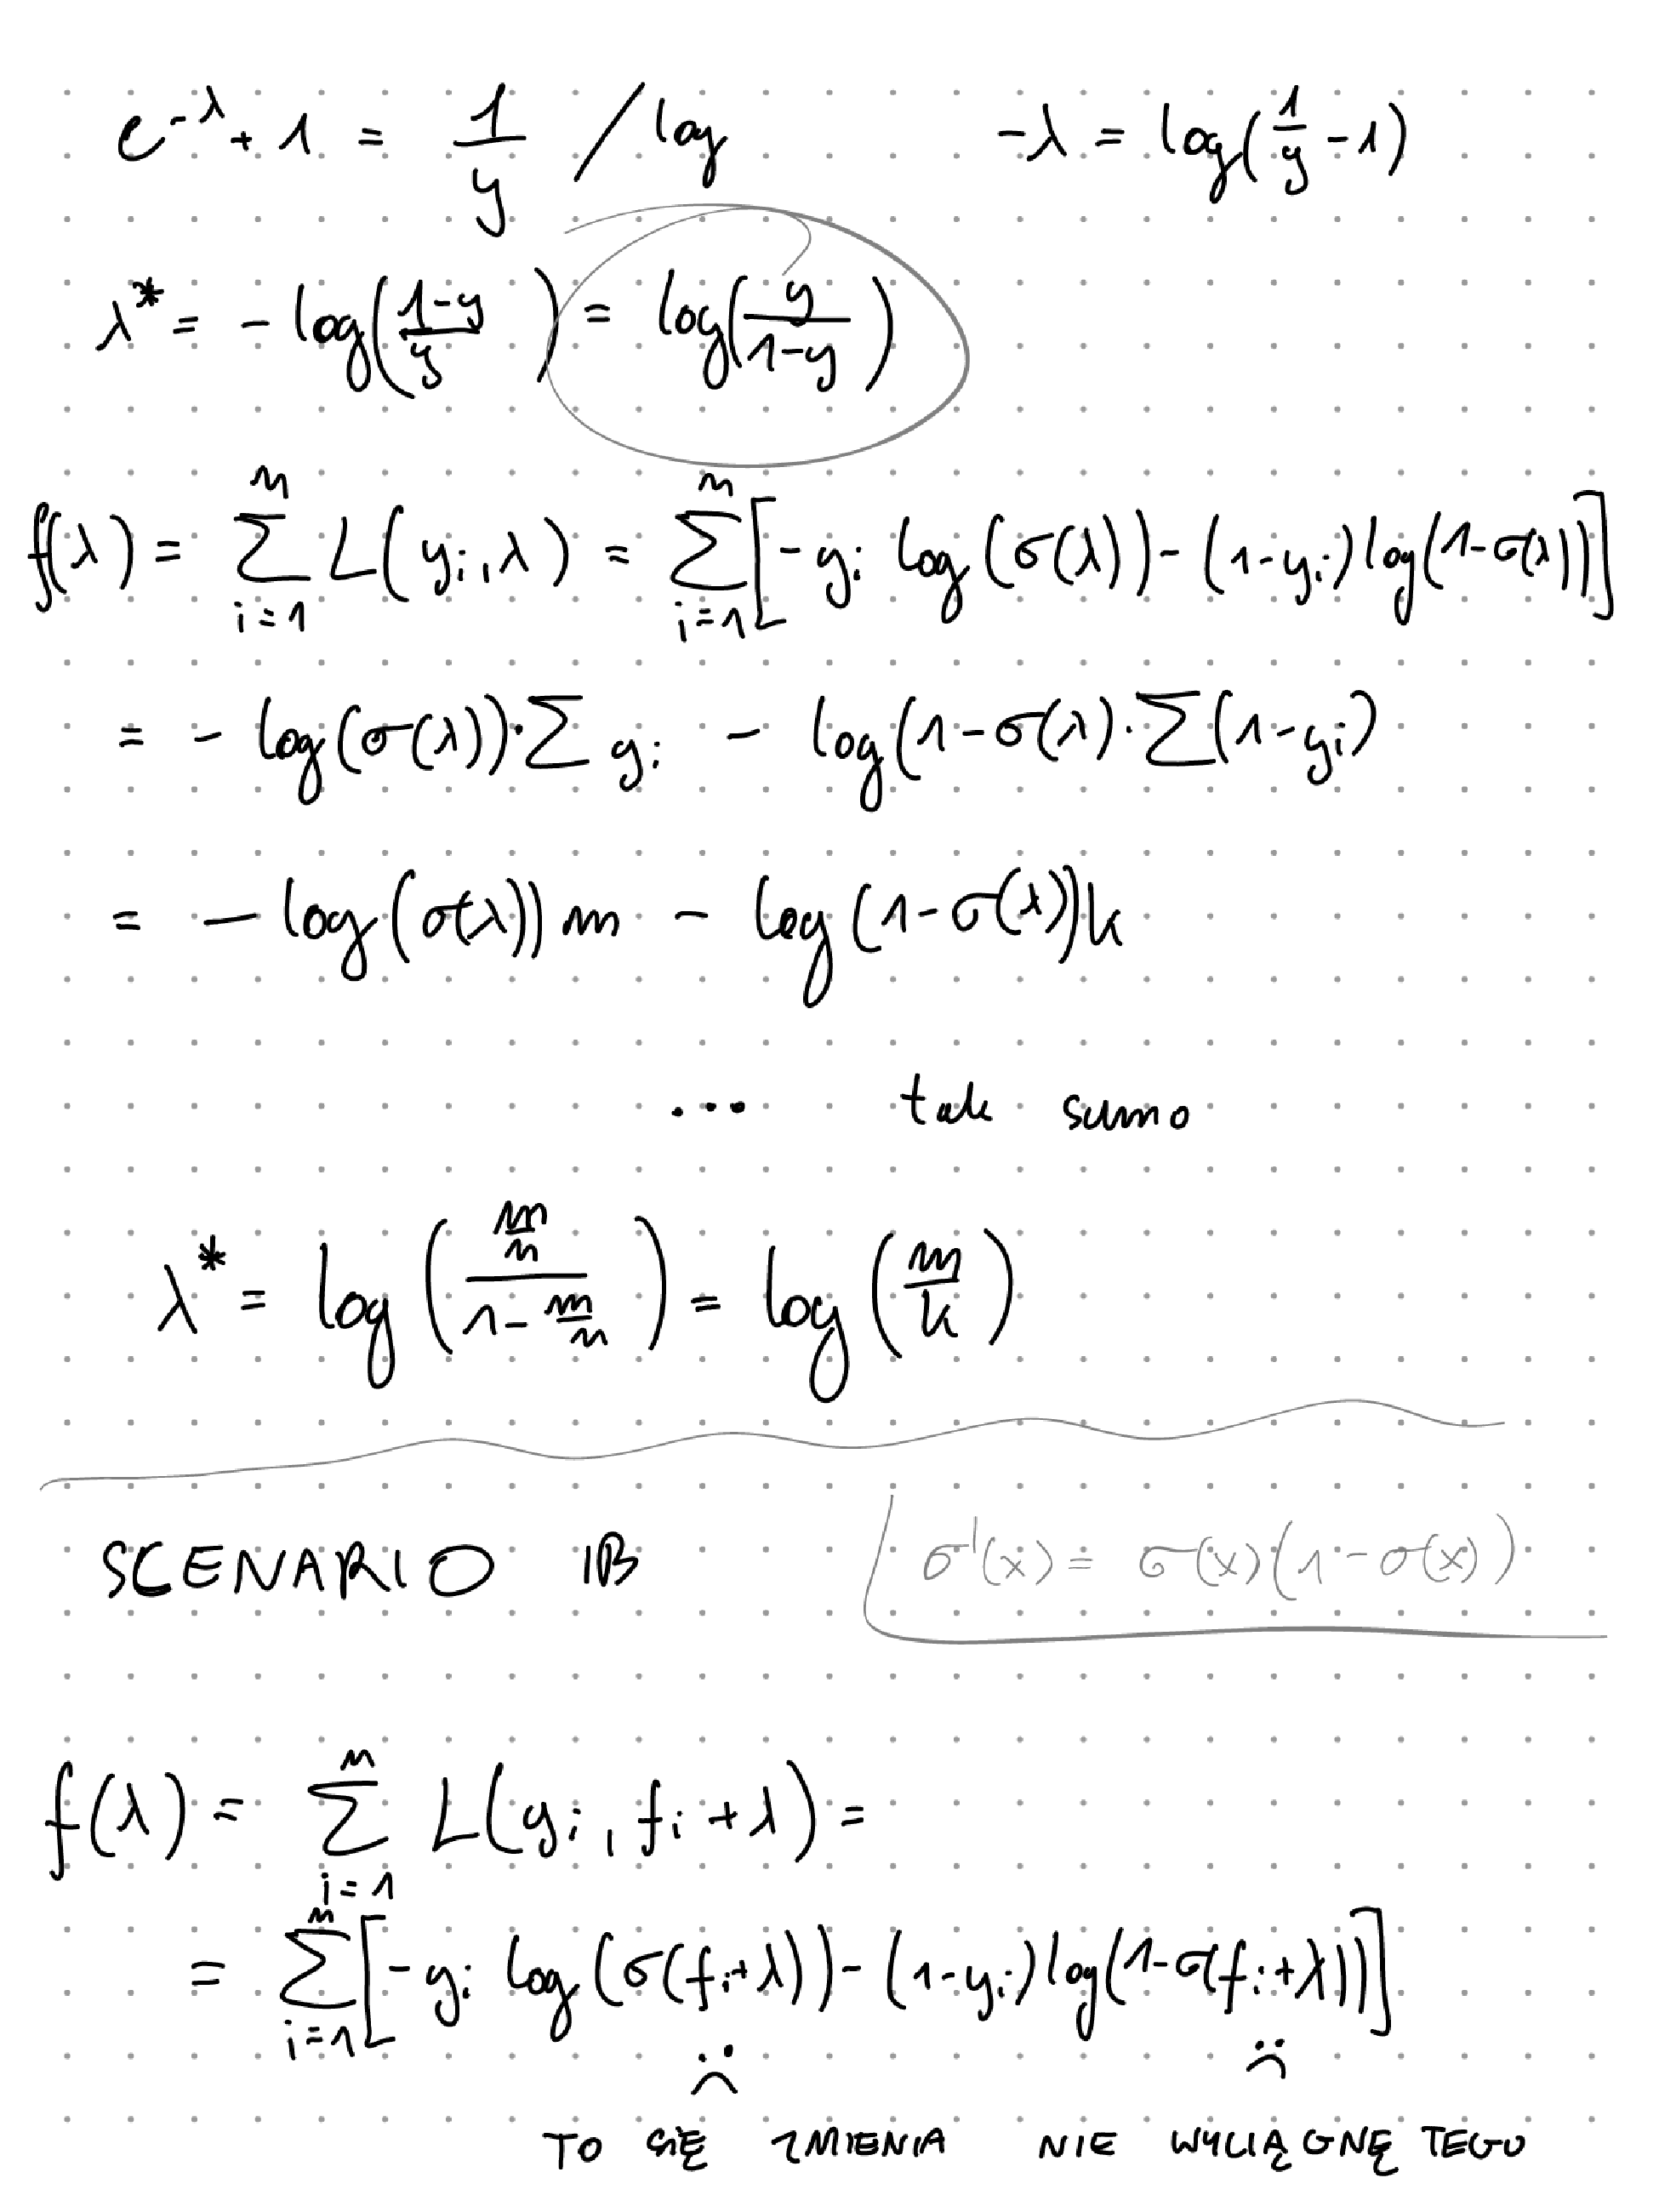

In [17]:
img2 = WImage(filename='/home/konstanty/Projects/UW/ML25/Lab7/samples/ml1_note.pdf[1]', resolution=100) # bigger
img2

y: [0 0 1 0 1 1 1 1 1 1]
fi: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004]


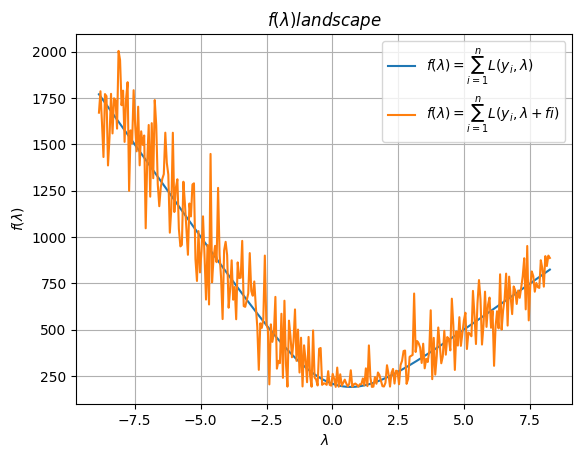

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt


# def sigmoid(z):
#     return 1/(1 + np.exp(-z))

# def Loss(y,z):
#     loss = -y * np.log(sigmoid(z)) - (1 - y) * np.log(1 - sigmoid(z))
#     return loss

# def f_lambda_A(lbd_vec, y_vec):
#     vals = []
#     for lbd in lbd_vec:
#         single_val = 0
#         for y in y_vec:
#             single_val += Loss(y,lbd)
#         vals.append(single_val)
#     return vals


def f_lambda_vectorized(lbd_vec, y_vec):
    z = lbd_vec[:, np.newaxis]
    y = y_vec[np.newaxis, :]

    sigmoid = 1/(1+np.exp(-z))
    sigmoid = np.clip(sigmoid, 1e-10, 1 - 1e-10)

    loss_matrix = -y * np.log(sigmoid) - (1 - y) * np.log(1 - sigmoid)
    f_lbd_value = np.sum(loss_matrix, axis=1)

    return f_lbd_value


# lambda m,n: np.log(m/n)

m = 200
k = 100
n = k + m

y = np.array([1] * m + [0] * k)
np.random.shuffle(y)

np.random.seed(42)
fi = np.random.normal(loc=0.0, scale=1.0, size=n)


print("y:", y[:10])
print("fi:", fi[:10])


lambda_min = -5 - np.max(fi)
labda_max = 5 - np.min(fi)
lambdas = np.linspace(lambda_min, labda_max, 300)

funcA_values = f_lambda_vectorized(lambdas, y)
funcB_values = f_lambda_vectorized(lambdas + fi, y)


plt.figure()
plt.plot(lambdas, funcA_values, lambdas, funcB_values)
# plt.title('$f(\\lambda) = \\sum_{i=1}^n L(y_i,\\lambda)$')
plt.title('$f(\\lambda) landscape$')
plt.legend(['$f(\\lambda) = \\sum_{i=1}^n L(y_i,\\lambda)$',
            '$f(\\lambda) = \\sum_{i=1}^n L(y_i,\\lambda + fi)$'])
plt.xlabel("$\\lambda$")
plt.ylabel("$f(\\lambda)$")
plt.grid(True)
plt.show()

# ANSWERS
- In the forward stagewise procedure we can't extract repeating terms $\sigma(\lambda)$ from sum causing pain because we can't now find closed solution. In single-parameter predictor we can find solution $\lambda^* = \log(\frac{m}{k})$

- The second procedure is more "realistic" thus provides very spiky loss landscape. First single-parameter predictor is more "theoretical and nice". Both landscapes are unimodal, however numerically computing gradient of spiky function might be hard. Better solution might be some genetic algorithm. 

    - The sigmoid function is smooth and strictly increasing.
    - Binary cross entropy is convex with respect to it's input.
    - the sum of shifted losses by $f_i$ is still convex

It's not about "difficult" landscape but sigmoid function which is nonlinear